In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from pathlib import Path
import time 
import sys
sys.path.append(str(Path.cwd().parents[1]))
from handle_data import HandleData
from sv_synthsonic import synthsonic
from evaluate_oversampler_cross_val import cross_validation
from handle_results import HandleResults
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, SVMSMOTE, ADASYN, BorderlineSMOTE
import smote_variants as sv

In [3]:
home = pathlib.Path.cwd().parent.parent
file = home.joinpath('Datasets', 'adult.csv')

df = pd.read_csv(file)
df.drop(columns=['fnlwgt','education'], inplace=True)

columns = ['workclass', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'label']
for label in columns :
    df[label] = LabelEncoder().fit_transform(df[label])

num_cols = [8,9]
cat_cols = [0,1,2,3,4,5,6,7,10,11]

In [4]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,27,4,10,0,1,4,4,0,0,0,44,39,0
1,27,4,13,4,10,1,4,0,0,0,40,39,0
2,25,4,12,2,12,0,4,1,0,0,40,39,0
3,46,4,3,2,14,0,0,1,0,1902,40,39,0
4,45,4,7,0,14,1,4,1,0,2824,76,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,43,2,14,2,4,0,4,1,0,0,40,39,1
32557,44,4,6,4,5,4,4,1,0,0,35,39,0
32558,23,4,10,5,12,3,4,0,0,0,40,39,0
32559,45,2,16,2,4,0,4,1,7688,0,45,39,1


In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
title = 'Adult'
clf = XGBClassifier(verbosity=0, use_label_encoder=False)
k_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=5)
random_state=5
oversamplers = [RandomOverSampler(random_state=random_state), 
                SMOTE(random_state=random_state, n_jobs=-1),
                SMOTENC(categorical_features=[],random_state=random_state),
                SVMSMOTE(random_state=random_state, n_jobs=-1), 
                ADASYN(random_state=random_state, n_jobs=-1), 
                BorderlineSMOTE(random_state=random_state, n_jobs=-1),
                synthsonic(distinct_threshold=20),
                sv.polynom_fit_SMOTE(random_state=random_state),
                sv.Random_SMOTE(random_state=random_state),
                sv.NoSMOTE()]
proportions = np.array([0.2, 0.4, 0.6, 0.8, 1.])
cv = cross_validation()

In [17]:
res = cv.loop_over_oversamplers(X,y,title, oversamplers, proportions)
respath = Path.cwd().parents[1] / 'CSV_results' / 'Cross_validation'
res.to_csv(respath.joinpath('cross_validation_adult.csv'))

oversampler:  60%|██████    | 6/10 [04:24<03:04, 46.09s/it]2021-07-30 17:18:08,156:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 17:18:08,156:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/55.0 [00:00<?, ?it/s]
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 1027.11it/s]

Generating for node: 0:   0%|          | 0/12 [00:00<?, ?it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 11: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]

Generating for node: 11: 100%|██████████| 12/12 [00:00<00:00, 37.61it/s]
2021-07-

Generating for node: 2: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]

Generating for node: 2: 100%|██████████| 12/12 [00:00<00:00, 39.12it/s][A
2021-07-30 17:18:25,710:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 17:18:25,710:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.4, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/55.0 [00:00<?, ?it/s]
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 1079.61it/s]

Generating for node: 0:   0%|          | 0/12 [00:00<?, ?it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 2: 100%|██████████| 12/12 [00:02<00:00,  4.42i

Generating for node: 11: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]

Generating for node: 11: 100%|██████████| 12/12 [00:00<00:00, 37.20it/s]
2021-07-30 17:18:37,391:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 17:18:37,391:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/55.0 [00:00<?, ?it/s]
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 1018.89it/s]

Generating for node: 0:   0%|          | 0/12 [00:00<?, ?it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 8: 100%|██████████| 12/12 [00:02<00:00,  4.29i

2021-07-30 17:18:49,229:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 17:18:49,229:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/55.0 [00:00<?, ?it/s]
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 1064.94it/s]

Generating for node: 0:   8%|▊         | 1/12 [00:00<00:01,  9.97it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 2: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]

Generating for node: 2: 100%|██████████| 12/12 [00:00<00:00, 37.62it/s][A
2021-07-30 17:18:55,087:INFO:synthsonic: Running sampling v

Generating for node: 8: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]

Generating for node: 8: 100%|██████████| 12/12 [00:00<00:00, 35.30it/s]
2021-07-30 17:19:07,075:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.8, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 17:19:07,075:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.8, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/55.0 [00:00<?, ?it/s]
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 1110.57it/s]

Generating for node: 0:   0%|          | 0/12 [00:00<?, ?it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 2: 100%|██████████| 12/12 [00:02<00:00,  4.39it/

Generating for node: 2: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]

Generating for node: 2: 100%|██████████| 12/12 [00:00<00:00, 34.48it/s][A
2021-07-30 17:19:19,061:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 17:19:19,061:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/55.0 [00:00<?, ?it/s]
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 1007.84it/s]

Generating for node: 0:   8%|▊         | 1/12 [00:00<00:01,  9.96it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 11: 100%|██████████| 12/12 [00:02<00:0

Generating for node: 8: 100%|██████████| 12/12 [00:00<00:00, 34.86it/s]
2021-07-30 17:19:31,185:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")
2021-07-30 17:19:31,185:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'distinct_threshold': 20, 'do_PCA': True, 'ordering': 'pca'}")

  0%|          | 0/55.0 [00:00<?, ?it/s]
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 1079.78it/s]

Generating for node: 0:   0%|          | 0/12 [00:00<?, ?it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"

Generating for node: 2: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]

Generating for node: 2: 100%|██████████| 12/12 [00:00<00:00, 33.38it/

2021-07-30 17:19:44,387:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 17:19:45,007:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 17:19:45,007:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.4, 'topology': 'star', 'random_state': 5}")
2021-07-30 17:19:45,610:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.6, 'topology': 'star', 'random_state': 5}")
2021-07-30 17:19:45,610:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.6, 'topology': 'star', 'random_state': 5}")
2021-07-30 17:19:46,209:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.6, 'topology': 'star', 'random_state': 5}")
2021-07-30 17:19:46,209:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit

2021-07-30 17:20:11,955:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 17:20:11,955:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 17:20:13,673:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 17:20:13,673:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 17:20:15,406:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
2021-07-30 17:20:15,406:INFO:Random_SMOTE: Running sampling via ('Random_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 5}")
oversampler:  90%|█████████ | 9/10 [06:33<00:38, 38.66s/it]2021-07-30 17:20:

In [19]:
res = res.reset_index(drop=True)
a = res.oversampler.unique()
b = ['RandomOverSampler', 
     'SMOTE', 
     'SMOTENC', 
     'SVMSMOTE', 
     'ADASYN', 
     'BorderlineSMOTE', 
     'synthsonic', 
     'polynom_fit_SMOTE',
     'Random_SMOTE',
     'NoSMOTE']

for old, new in zip(a,b) :
    res.loc[res.oversampler == old, 'oversampler'] = new

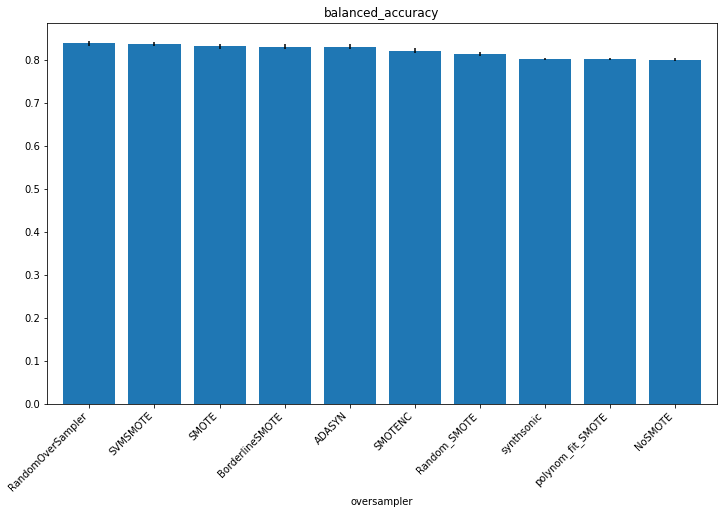

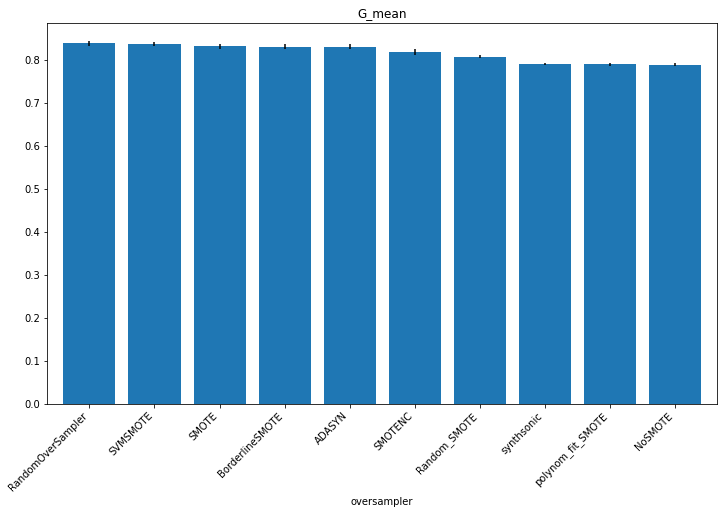

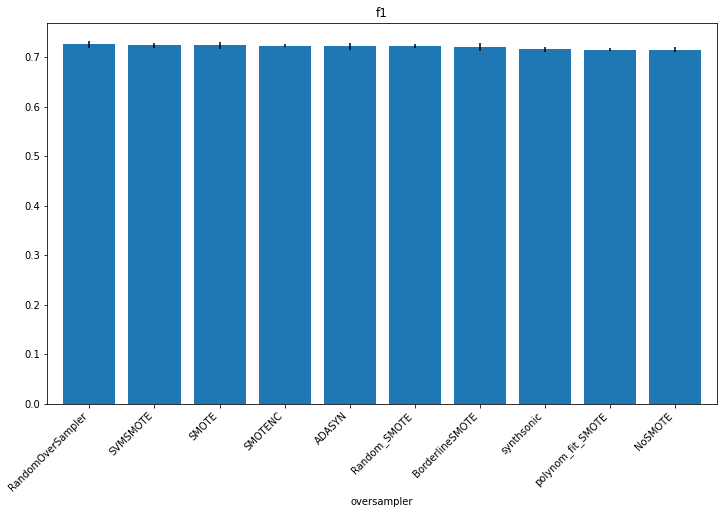

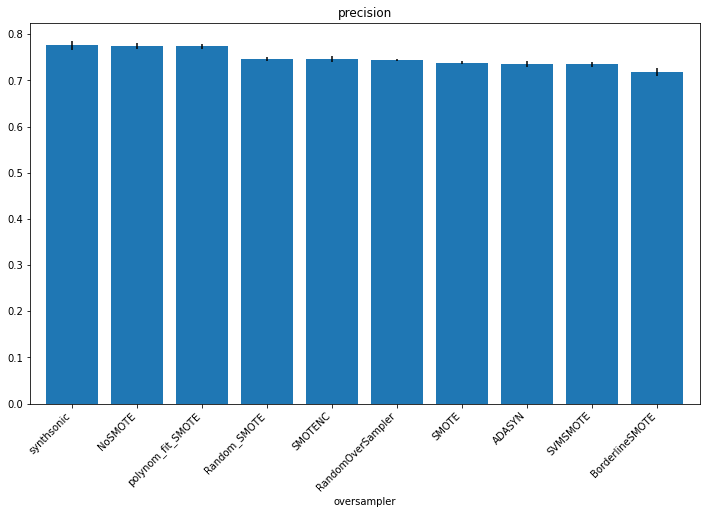

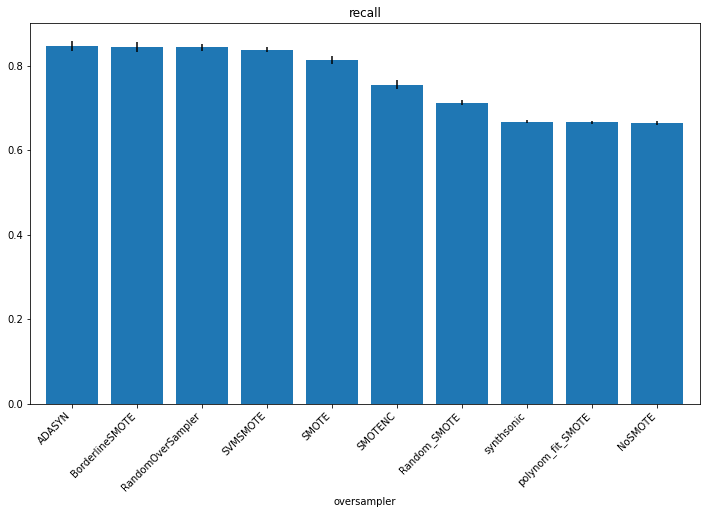

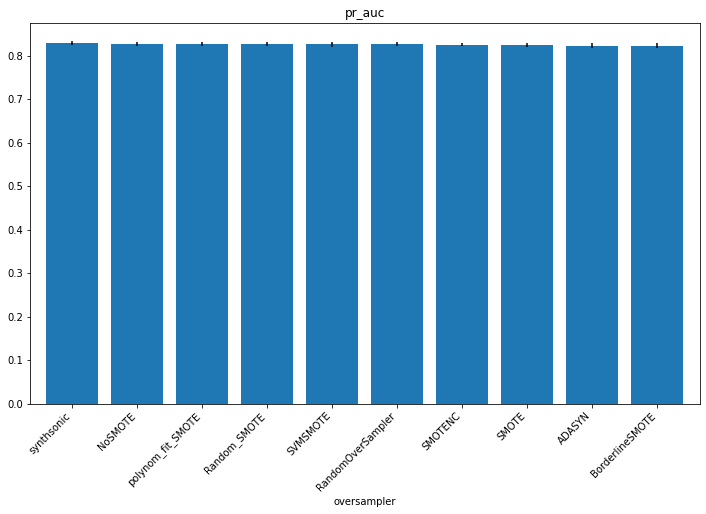

In [21]:
hr = HandleResults()
metrics = ['balanced_accuracy', 'G_mean', 'f1', 'precision', 'recall', 'pr_auc']

for i in metrics :
    hr.plot_bar_metric(res, i)

In [22]:
hr.select_best(res, 'pr_auc')

,dataset,oversampler,proportion,balanced_accuracy,balanced_accuracy_std,G_mean,G_mean_std,f1,f1_std,precision,precision_std,recall,recall_std,pr_auc,pr_auc_std,runtime,runtime_std
25,Adult,synthsonic,0.6,0.801019,0.003327,0.788999,0.003567,0.714870,0.005908,0.775862,0.009199,0.662798,0.004723,0.829001,0.004670,5.245878,0.043795
36,Adult,NoSMOTE,0.4,0.801437,0.003529,0.789595,0.003937,0.715138,0.005662,0.774545,0.006133,0.664202,0.005640,0.827900,0.004541,0.002326,0.000091
28,Adult,polynom_fit_SMOTE,0.4,0.800727,0.004624,0.788968,0.005279,0.713472,0.007065,0.770834,0.006658,0.664075,0.008087,0.827225,0.005039,0.040582,0.001081
33,Adult,Random_SMOTE,0.6,0.812113,0.002412,0.804444,0.002611,0.721657,0.003974,0.743828,0.006544,0.700804,0.004251,0.826893,0.005265,0.577450,0.004574
12,Adult,SVMSMOTE,0.4,0.816173,0.003253,0.809743,0.003458,0.724383,0.005139,0.735137,0.005709,0.713940,0.004679,0.826613,0.005388,8.439542,0.736355
0,Adult,RandomOverSampler,0.4,0.815048,0.003054,0.807922,0.003481,0.725028,0.004009,0.743391,0.001895,0.707564,0.006062,0.826307,0.004788,0.006895,0.000360
8,Adult,SMOTENC,0.4,0.810865,0.003969,0.802804,0.004324,0.720748,0.006138,0.746344,0.006142,0.696851,0.006229,0.825573,0.003972,2.279989,0.043518
4,Adult,SMOTE,0.4,0.813286,0.004593,0.806126,0.005333,0.721811,0.005715,0.738661,0.003356,0.705779,0.009926,0.824606,0.004847,0.224088,0.030376
16,Adult,ADASYN,0.4,0.813957,0.005205,0.807080,0.005713,0.722026,0.007589,0.736135,0.006514,0.708457,0.008822,0.823069,0.006028,1.006855,0.057815
20,Adult,BorderlineSMOTE,0.4,0.816708,0.005133,0.811361,0.005479,0.720802,0.007816,0.718170,0.009470,0.723506,0.008372,0.822649,0.005811,1.024737,0.004233


2021-07-30 17:27:49,165:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': False, 'ordering': ''}")
2021-07-30 17:27:49,165:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': False, 'ordering': ''}")
Building tree: 100%|██████████| 55/55.0 [00:00<00:00, 829.68it/s]
Generating for node: 0:   8%|▊         | 1/12 [00:00<00:01,  9.99it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"
Generating for node: 2: 100%|██████████| 12/12 [00:00<00:00, 22.28it/s]
2021-07-30 17:27:54,444:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': False, 'ordering': ''}")
2021-07-30 17:27:54,444:

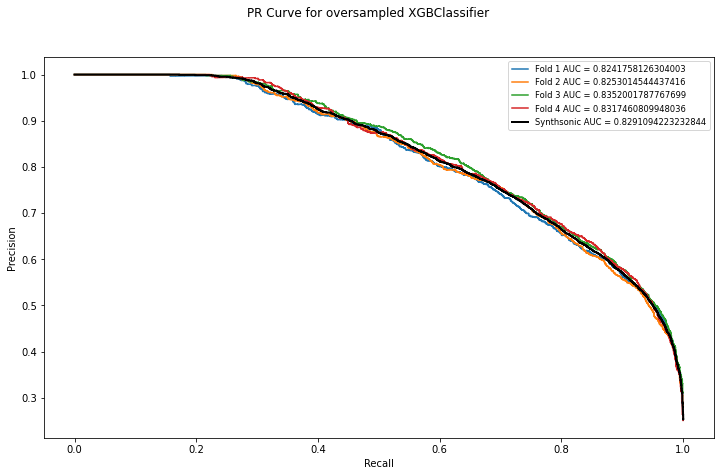

In [23]:
over = synthsonic(proportion=0.6, 
                  do_PCA=False, 
                  ordering='', 
                  numerical_features = num_cols, 
                  categorical_features = cat_cols)

# make plots
f, axes = plt.subplots(figsize=(12, 7))
f.suptitle(f"PR Curve for oversampled XGBClassifier")

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X,y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    X_g, y_g = cv.generate_from_oversampler(over, X_train, y_train)
    
    clf.fit(X_g, y_g)
    probas = clf.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, probas[:,1])
    lab = f"Fold {i} AUC = {auc(recall, precision)}"
    axes.step(recall, precision, label=lab)
    y_real.append(y_test)
    y_proba.append(probas[:,1])

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision_synth, recall_synth, _ = precision_recall_curve(y_real, y_proba)
lab_synth = f"Synthsonic AUC = {auc(recall_synth, precision_synth)}"
axes.step(recall_synth, precision_synth, label=lab_synth, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(fontsize='small')

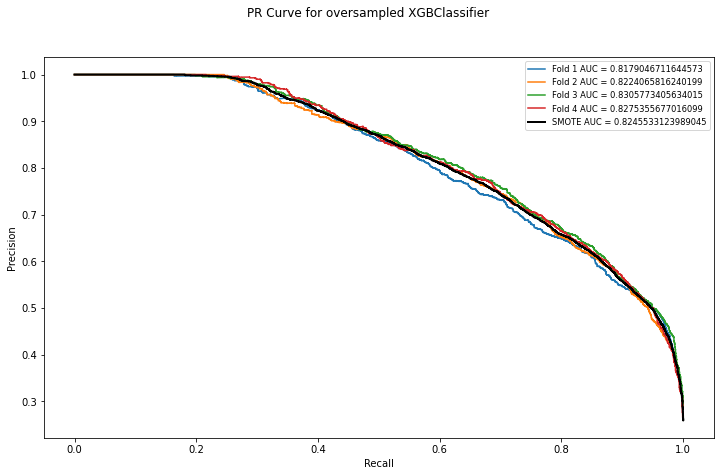

In [24]:
over = SMOTE(sampling_strategy=0.4, random_state=5)
# make plots
f, axes = plt.subplots(figsize=(12, 7))
f.suptitle(f"PR Curve for oversampled XGBClassifier")

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X,y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    X_g, y_g = cv.generate_from_oversampler(over, X_train, y_train)
    
    clf.fit(X_g, y_g)
    probas = clf.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, probas[:,1])
    lab = f"Fold {i} AUC = {auc(recall, precision)}"
    axes.step(recall, precision, label=lab)
    y_real.append(y_test)
    y_proba.append(probas[:,1])

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision_smote, recall_smote, _ = precision_recall_curve(y_real, y_proba)
lab_smote = f"SMOTE AUC = {auc(recall_smote, precision_smote)}"
axes.step(recall_smote, precision_smote, label=lab_smote, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(fontsize='small')

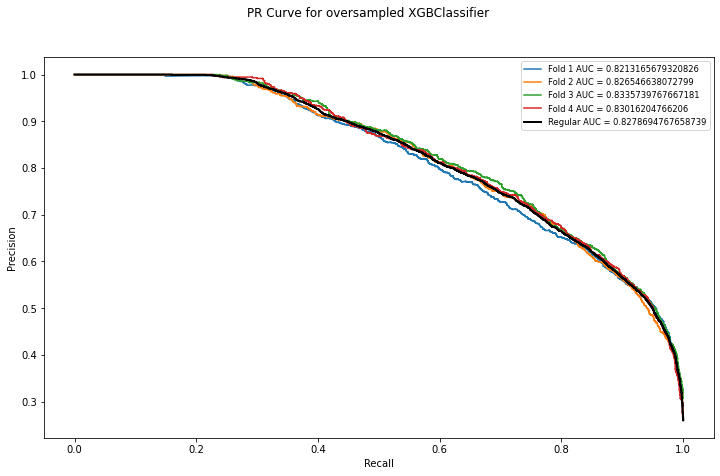

In [25]:
f, axes = plt.subplots(figsize=(12, 7))
f.suptitle(f"PR Curve for oversampled XGBClassifier")

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X,y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    
    clf.fit(X_train, y_train)
    probas = clf.predict_proba(X_test)
    precision, recall, _ = precision_recall_curve(y_test, probas[:,1])
    lab = f"Fold {i} AUC = {auc(recall, precision)}"
    axes.step(recall, precision, label=lab)
    y_real.append(y_test)
    y_proba.append(probas[:,1])

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = f"Regular AUC = {auc(recall, precision)}"
axes.step(recall, precision, label=lab, lw=2, color='black')
axes.set_xlabel('Recall')
axes.set_ylabel('Precision')
axes.legend(fontsize='small')

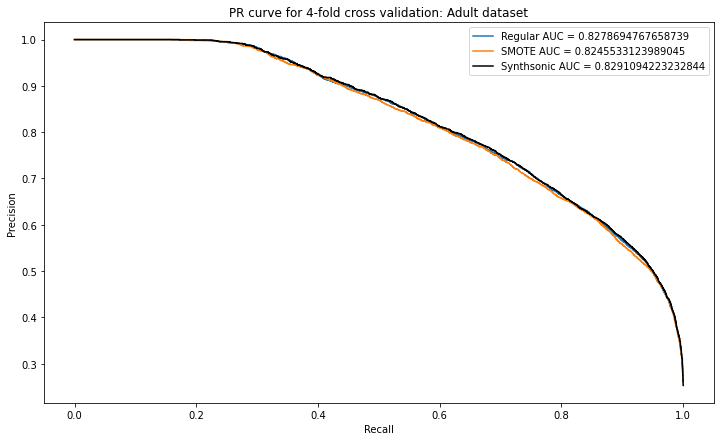

In [26]:
f, axes = plt.subplots(figsize=(12, 7))

axes.plot(recall, precision, label=lab)
axes.plot(recall_smote, precision_smote, label=lab_smote)
axes.plot(recall_synth, precision_synth, label=lab_synth, color='black')

axes.set_title("PR curve for 4-fold cross validation: Adult dataset")
axes.set_xlabel("Recall")
axes.set_ylabel("Precision")
axes.legend()